In [1]:
import os
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import DataFrameMaker
from mu2e.mu2eplots import mu2e_plot, mu2e_plot3d
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
from skhep.visual import MplPlotter as splt
from copy import deepcopy
from lmfit import Model, Parameters, report_fit

/usr/local/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning:

The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.

/usr/local/lib/python3.6/site-packages/plotly/widgets/graph_widget.py:13: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



<IPython.core.display.Javascript object>

# 8 Slice

0
(140, 10)
375.0
1450.0
0.002490821
2260594    0.002491
Name: Br, dtype: float64
fitting with n=20, m=20, cn=0, cm=0
Elapsed time was 336.709 seconds
[[Fit Statistics]]
    # function evals   = 30
    # data points      = 4200
    # variables        = 362
    chi-square         = 0.001
    reduced chi-square = 0.000
    Akaike info crit   = -62599.400
    Bayesian info crit = -60303.292
[[Variables]]
    R:         25000 (fixed)
    ns:        20 (fixed)
    ms:        20 (fixed)
    A_0_0:     0 (fixed)
    B_0_0:     0 (fixed)
    C_0_0:     0 (fixed)
    D_0_0:     0 (fixed)
    A_0_1:     0 (fixed)
    B_0_1:     0 (fixed)
    C_0_1:     0 (fixed)
    D_0_1:     0 (fixed)
    A_0_2:     0 (fixed)
    B_0_2:     0 (fixed)
    C_0_2:     0 (fixed)
    D_0_2:     0 (fixed)
    A_0_3:     0 (fixed)
    B_0_3:     0 (fixed)
    C_0_3:     0 (fixed)
    D_0_3:     0 (fixed)
    A_0_4:     0 (fixed)
    B_0_4:     0 (fixed)
    C_0_4:     0 (fixed)
    D_0_4:     0 (fixed)
    A_0_5:    

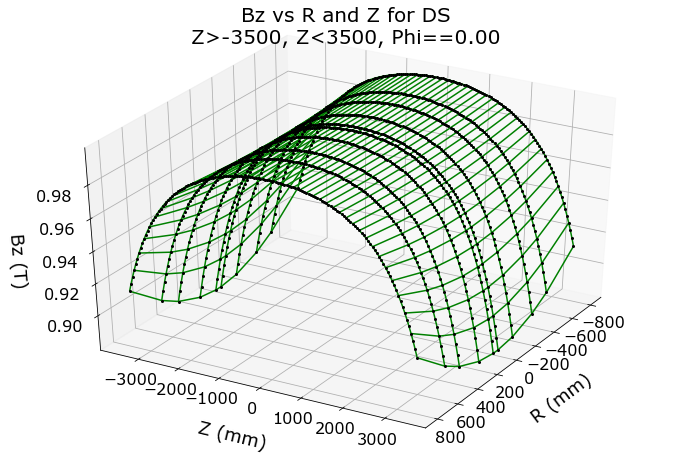

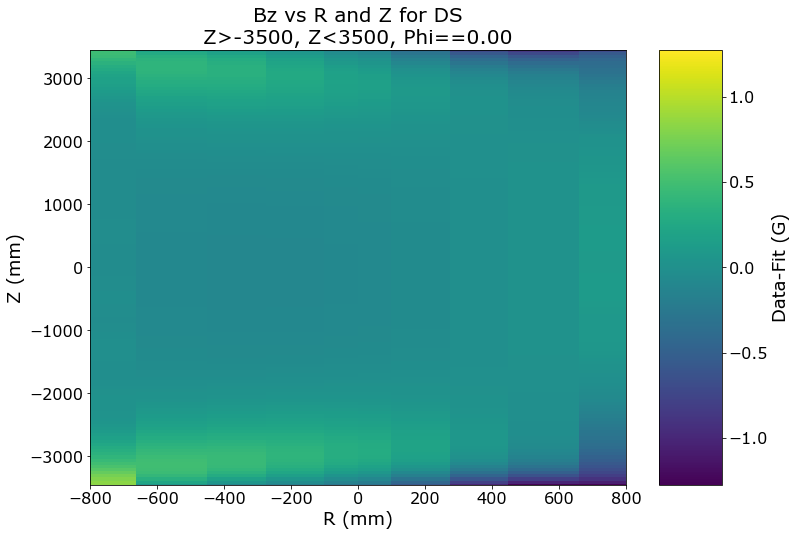

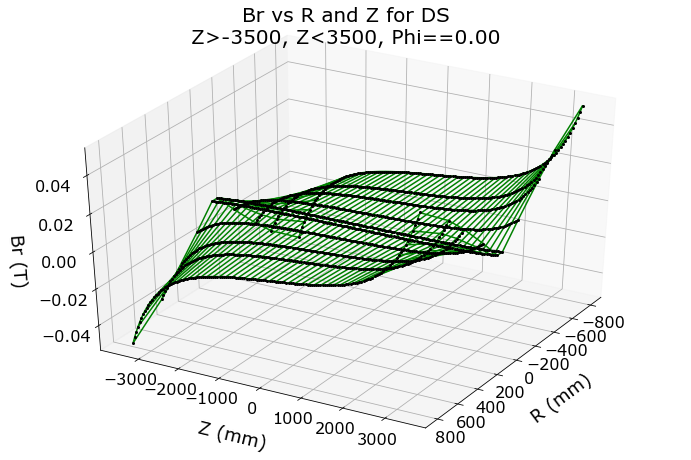

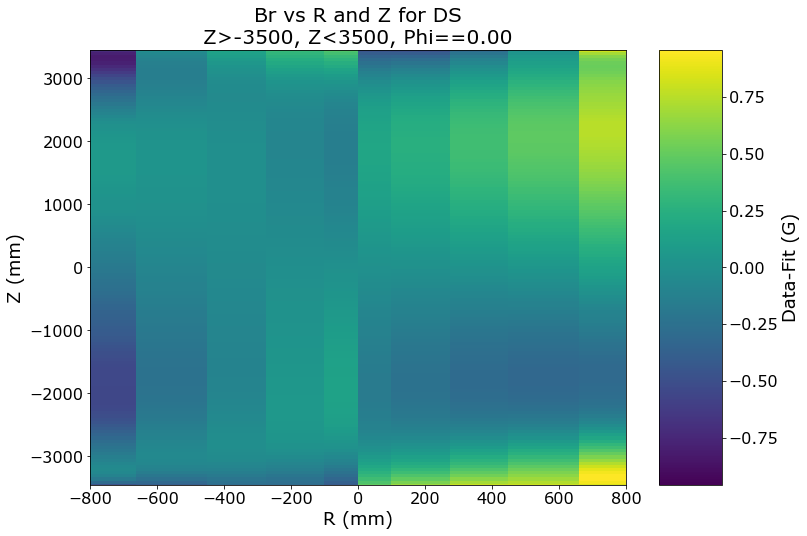

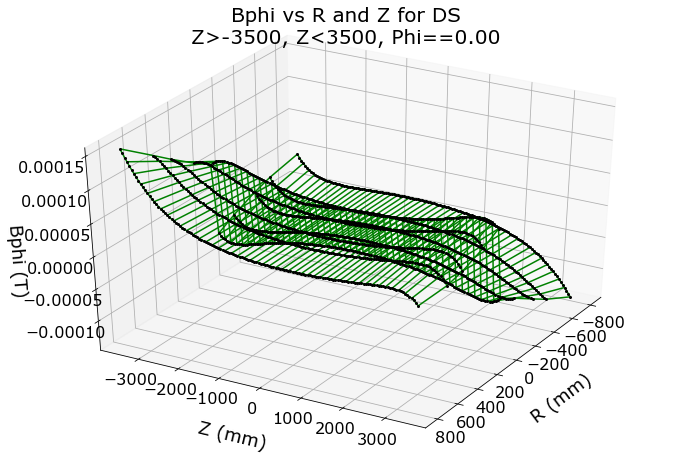

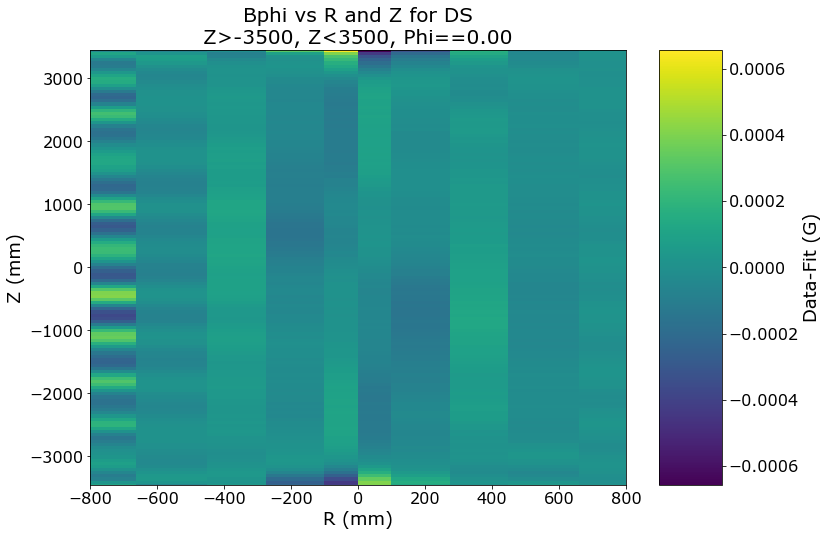

In [61]:
run hallprobesim.py

In [62]:
ff1 = deepcopy(ff)

In [63]:
labs=[i[2:] for i in ff1.params if ('A' in i and ff1.params[i].vary==True and i.split('_')[1] != '0')]

As_1=[ff1.params[i].value for i in ff1.params if ('A' in i and ff1.params[i].vary==True and i.split('_')[1] != '0')]

Bs_1=[ff1.params[i].value for i in ff1.params if ('B' in i and ff1.params[i].vary==True and i.split('_')[1] != '0')]

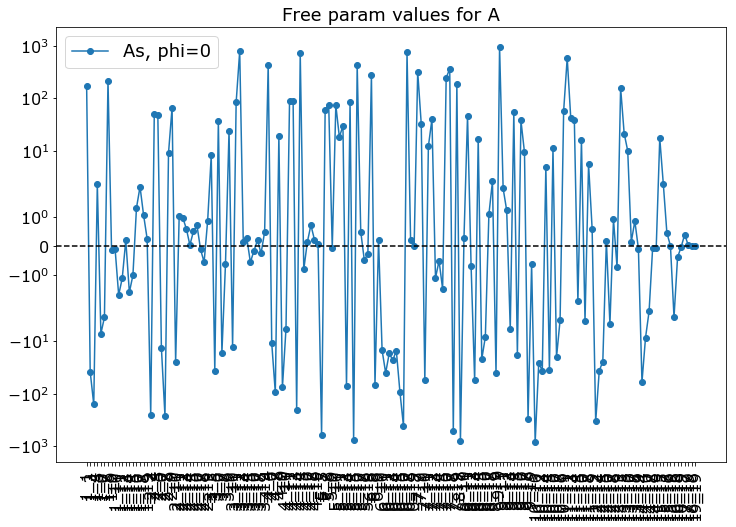

In [64]:
_ = plt.plot(range(len(As_1)),As_1, 'o-', label='As, phi=0')
_ = plt.axhline(0,0, 1, linestyle='--', color='k')

_ = plt.xticks(range(len(As_1)), labs, rotation='vertical')
plt.yscale('symlog')
plt.legend()
plt.title('Free param values for A')

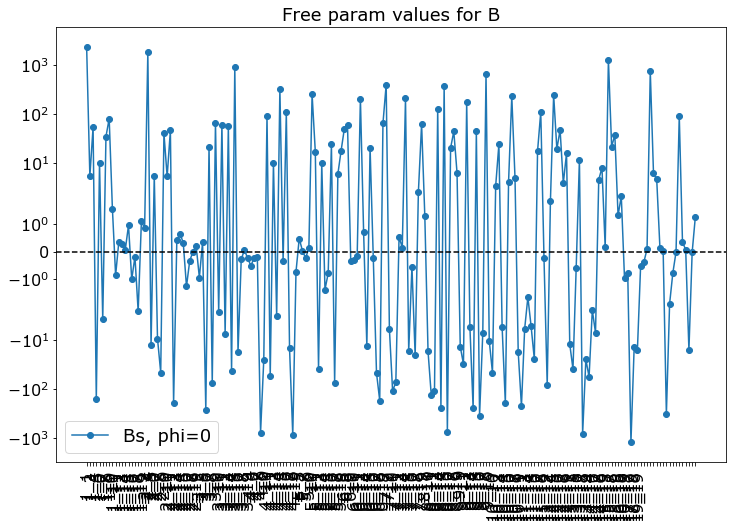

In [65]:
_ = plt.plot(range(len(Bs_1)),Bs_1, 'o-', label='Bs, phi=0')
_ = plt.axhline(0,0, 1, linestyle='--', color='k')


_ = plt.xticks(range(len(Bs_1)), labs, rotation='vertical')
plt.yscale('symlog')
plt.legend()
plt.title('Free param values for B')

In [66]:
n,m = np.meshgrid(range(21),range(21))
Anm = np.asarray([ff1.params[i] for i in ff1.params if 'A' in i]).reshape(20,20)
Bnm = np.asarray([ff1.params[i] for i in ff1.params if 'B' in i]).reshape(20,20)
AB_comb = Anm**2+Bnm**2

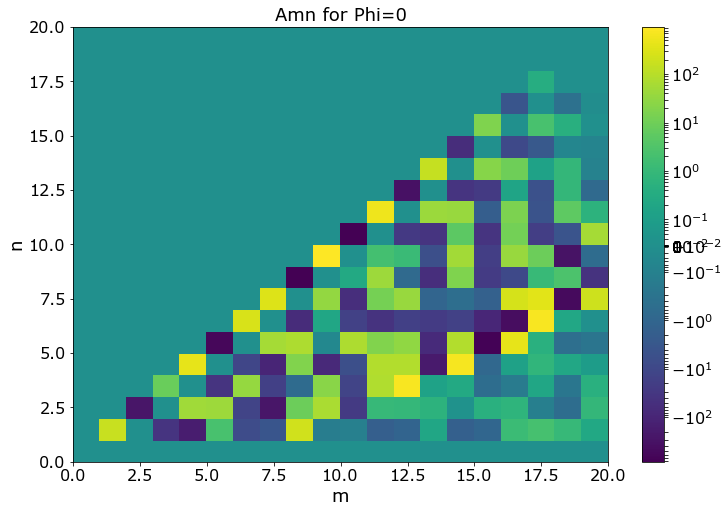

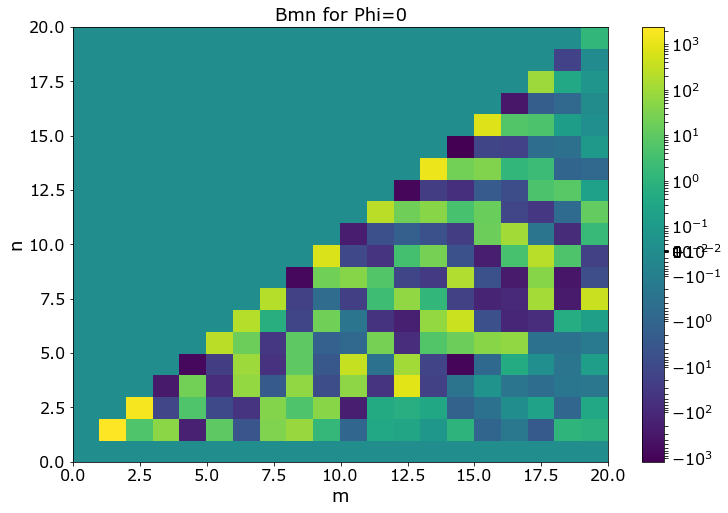

In [67]:
import matplotlib.colors as colors
plt.pcolor(n,m, Anm,
          norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=Anm.min(), vmax=Anm.max()))
plt.colorbar()
plt.title('Amn for Phi=0')
plt.xlabel('m')
plt.ylabel('n')
plt.figure()
plt.pcolor(n,m, Bnm,
          norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=Bnm.min(), vmax=Bnm.max()))
plt.colorbar()
plt.title('Bmn for Phi=0')
plt.xlabel('m')
plt.ylabel('n')

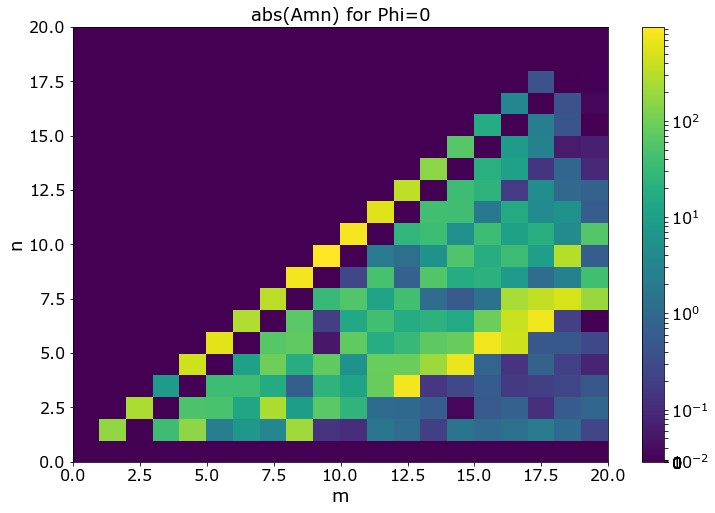

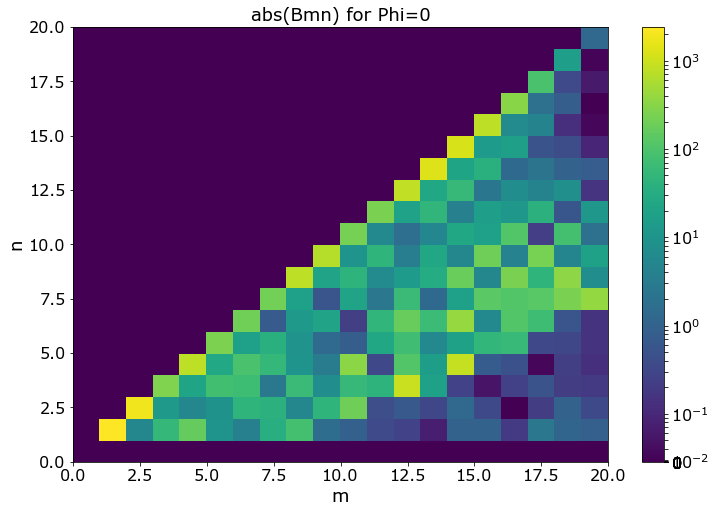

In [68]:
import matplotlib.colors as colors
plt.pcolor(n,m, abs(Anm),
          norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=0, vmax=Anm.max()))
plt.colorbar()
plt.title('abs(Amn) for Phi=0')
plt.xlabel('m')
plt.ylabel('n')
plt.figure()
plt.pcolor(n,m, abs(Bnm),
          norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=0, vmax=Bnm.max()))
plt.colorbar()
plt.title('abs(Bmn) for Phi=0')
plt.xlabel('m')
plt.ylabel('n')

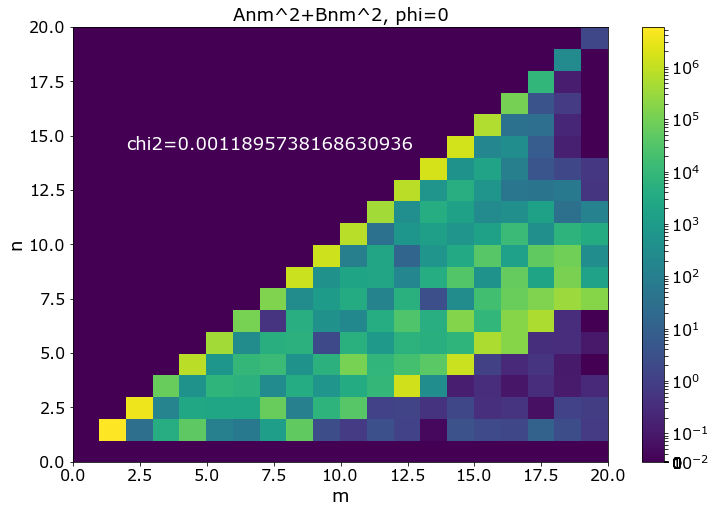

In [69]:
import matplotlib.colors as colors
plt.pcolor(n,m, AB_comb,
          norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=AB_comb.min(), vmax=AB_comb.max()))
plt.colorbar()
plt.title('Anm^2+Bnm^2, phi=0')
plt.xlabel('m')
plt.ylabel('n')
ax = plt.gca()
ax.text(0.1, 0.75, f'chi2={ff1.result.chisqr}',
        horizontalalignment='left',
        verticalalignment='top',
        color='white',
        fontsize=18,
        transform=ax.transAxes)

In [70]:
ff1.result.chisqr

0.0011895738168630936